<a href="https://colab.research.google.com/github/wathusiridream/Machine-Learning-Practice/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install statsmodels

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('gold_monthly_csv.csv')

In [45]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [46]:
df.shape

(847, 2)

In [47]:
print(f"Date range of gold prices avaliable from = {df.loc[: , 'Date'][0]} to {df.loc[: , 'Date'][len(df)-1]}")

Date range of gold prices avaliable from = 1950-01 to 2020-07


In [48]:

date = pd.date_range(start = '1/1/1950' , end = '8/1/2020' , freq = 'M')

In [49]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [50]:

df['month'] = date
df.drop('Date' , axis = 1 , inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


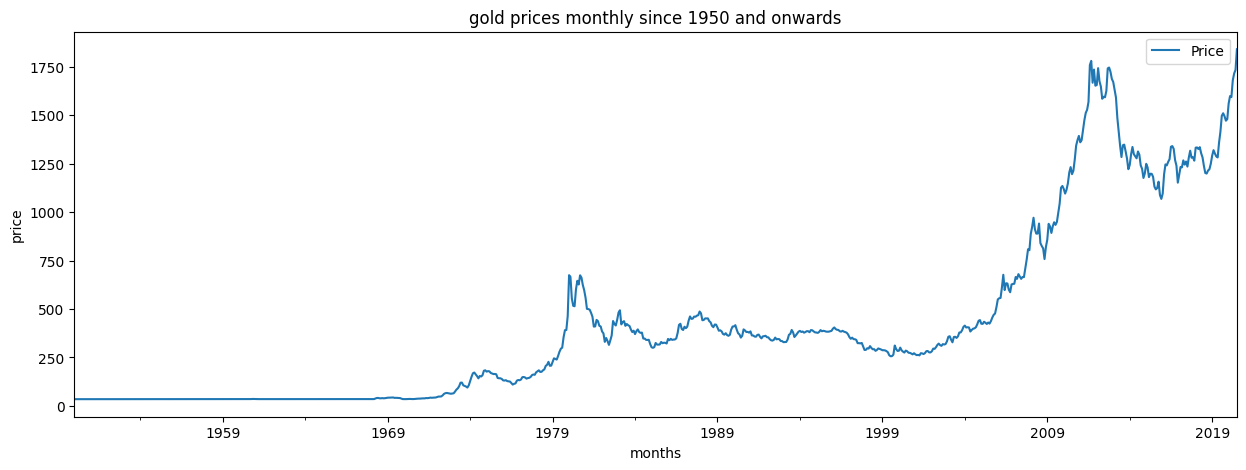

In [51]:
df.plot(figsize = (15,5))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel('months')
plt.ylabel('price')
plt.grid;

In [52]:
round(df.describe() , 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


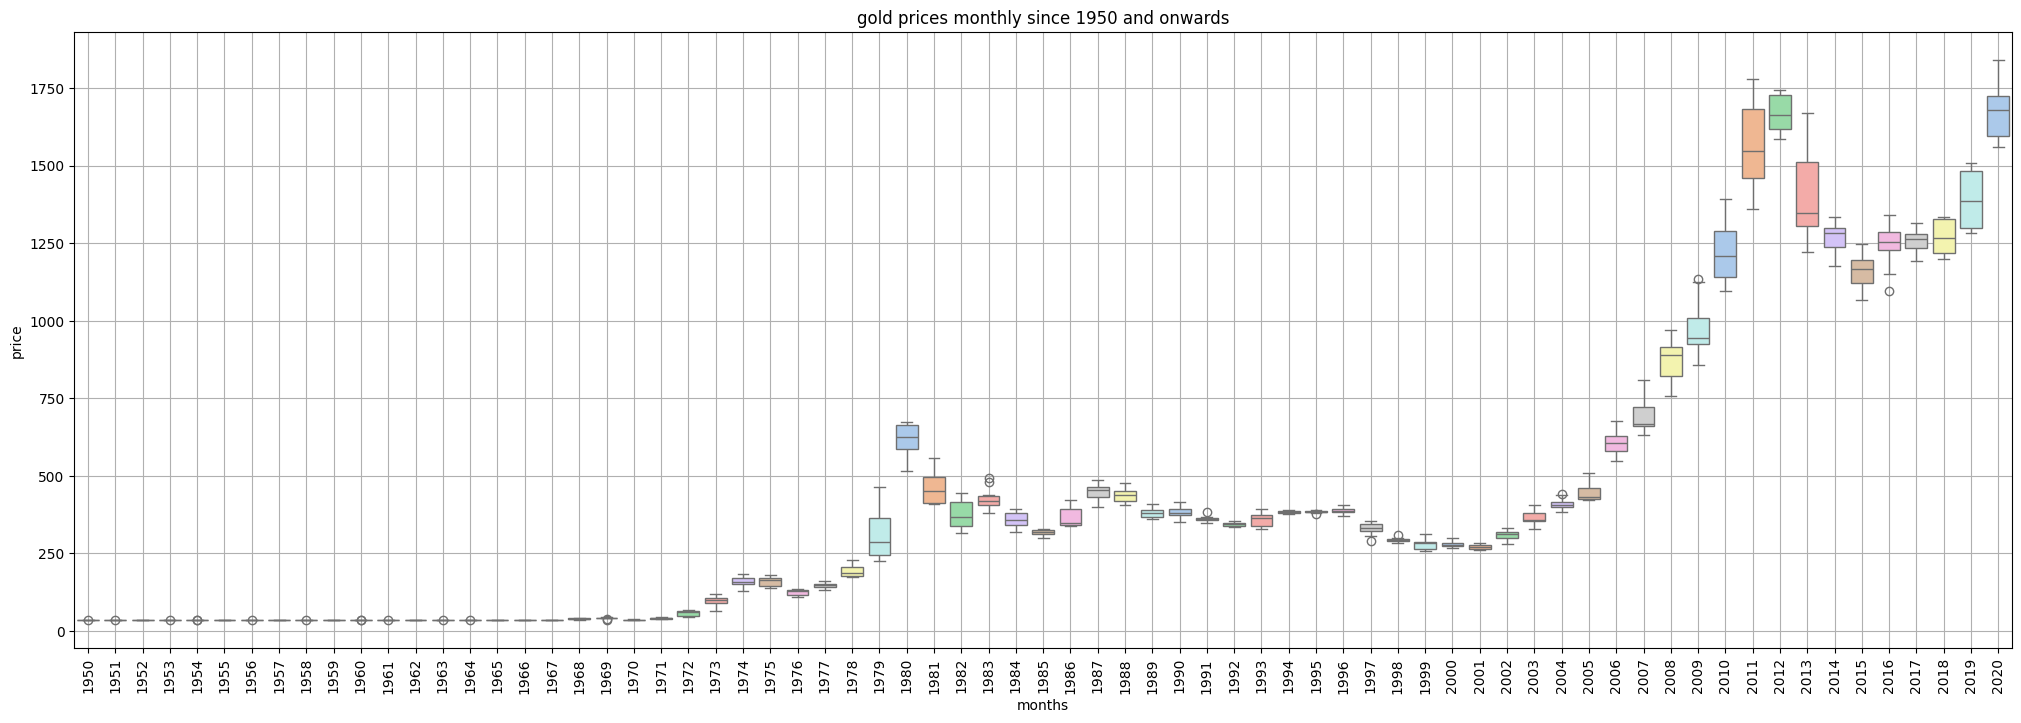

In [53]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year , y=df.values[:,0] , ax = ax , palette = 'pastel')
plt.title('gold prices monthly since 1950 and onwards')
plt.xlabel('months')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid();

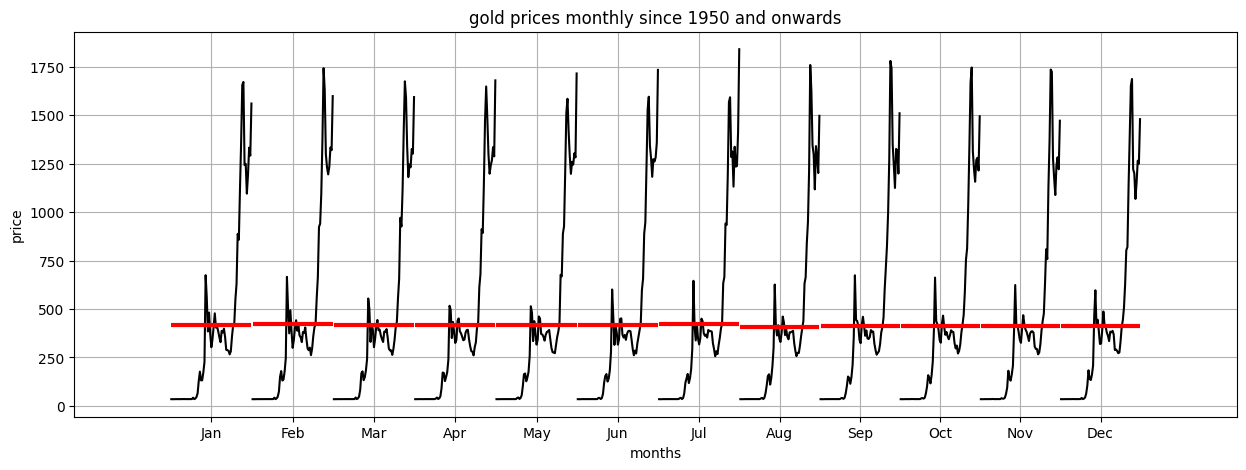

In [54]:
from statsmodels.graphics.tsaplots import month_plot

fig , ax = plt.subplots(figsize = (15,5))
month_plot(df , ax = ax , )
plt.title('gold prices monthly since 1950 and onwards')
plt.xlabel('months')
plt.ylabel('price')
plt.grid();

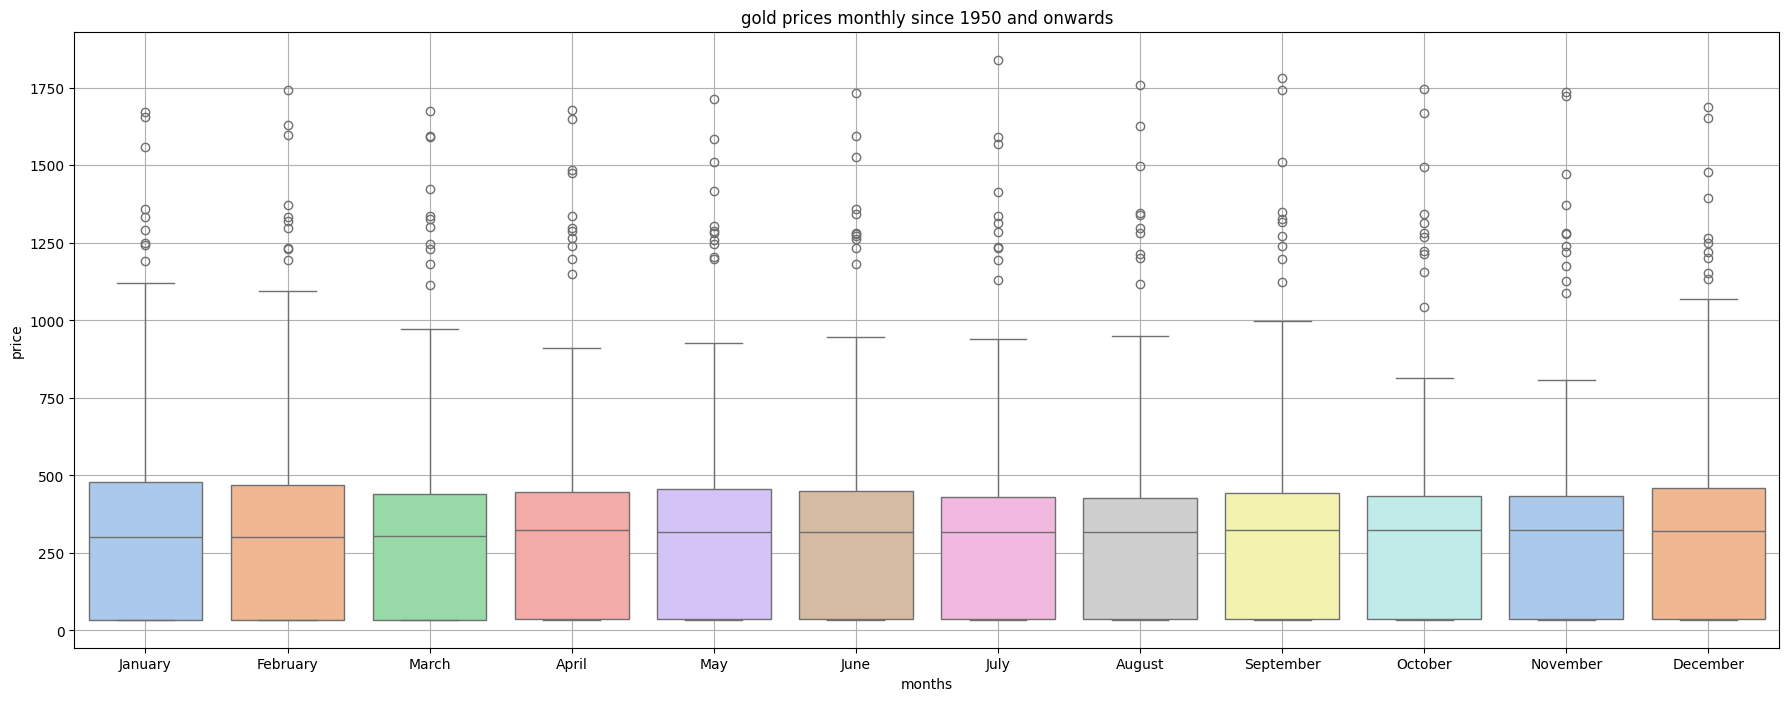

In [55]:
_, ax = plt.subplots(figsize = (22, 8))
sns.boxplot(x = df.index.month_name() , y = df.values[: , 0] , ax = ax , palette = 'pastel')
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel('months')
plt.ylabel('price')
plt.grid();

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

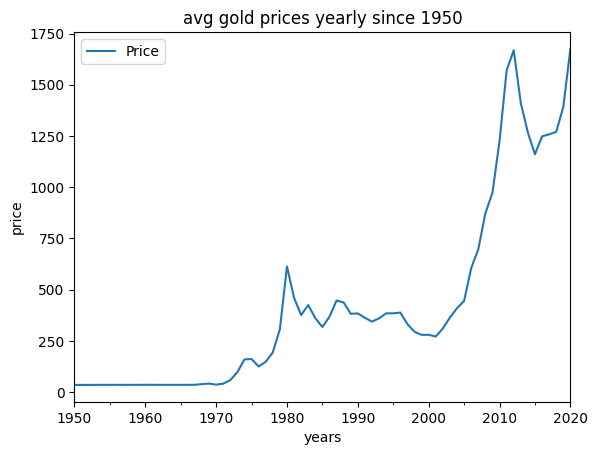

In [56]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold prices yearly since 1950")
plt.xlabel('years')
plt.ylabel('price')
plt.grid

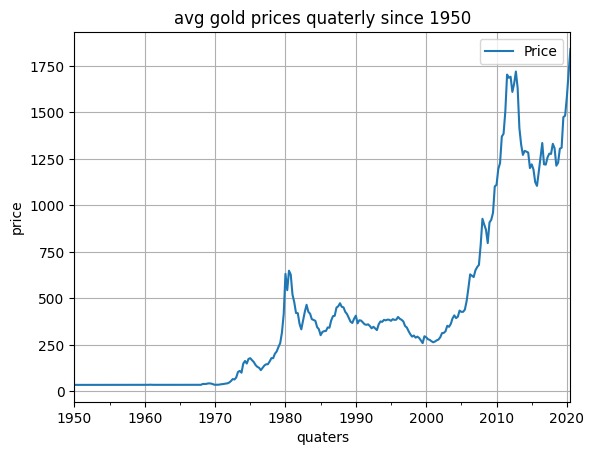

In [57]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title("avg gold prices quaterly since 1950")
plt.xlabel('quaters')
plt.ylabel('price')
plt.grid();

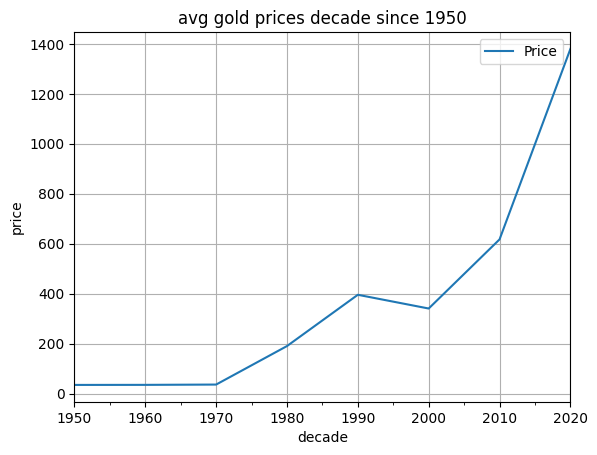

In [58]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("avg gold prices decade since 1950")
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

In [59]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price' : 'Std'}) , left_index = True , right_index = True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) *100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


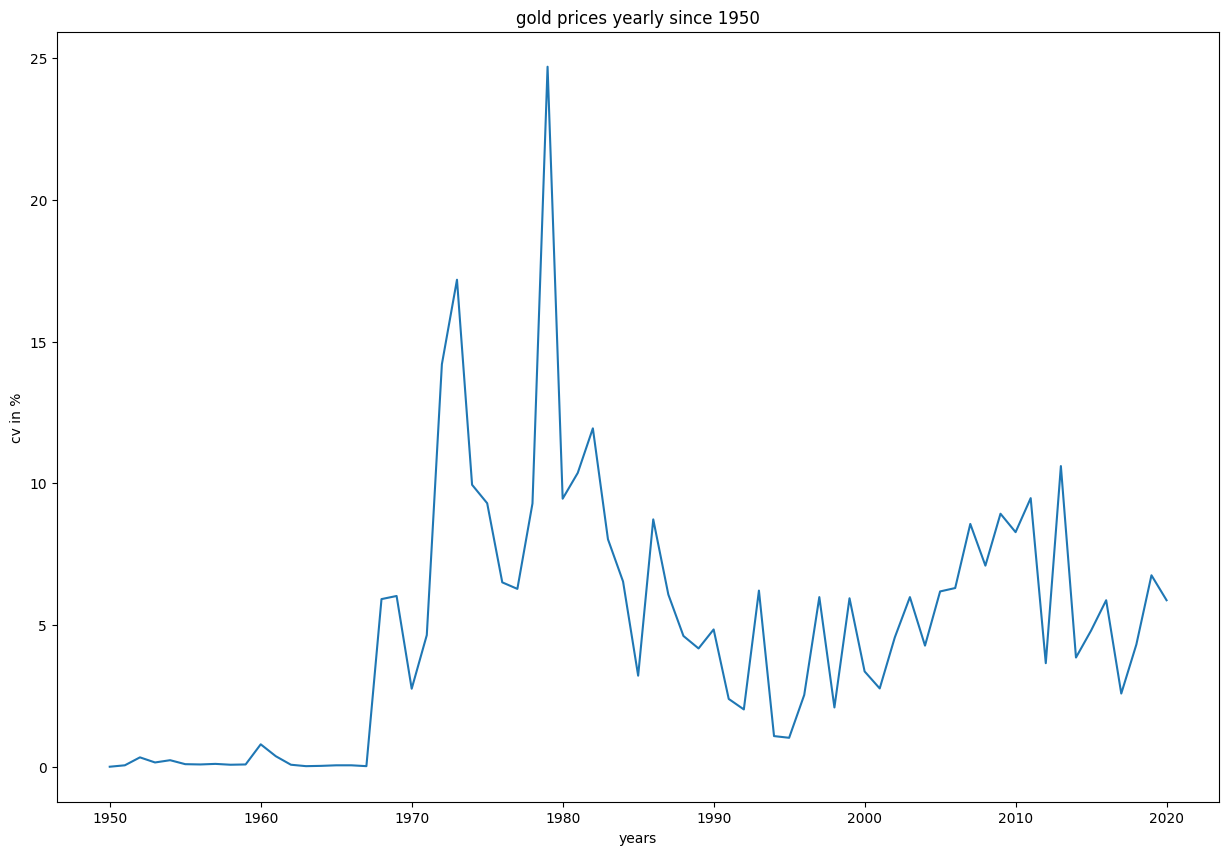

In [60]:
fig. ax = plt.subplots(figsize = (15 , 10))
df_1['Cov_pct'].plot();
plt.title("gold prices yearly since 1950")
plt.xlabel('years')
plt.ylabel('cv in %')
plt.show();

In [61]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [62]:
print(train.shape)

(792, 1)


In [63]:
print(test.shape)

(55, 1)


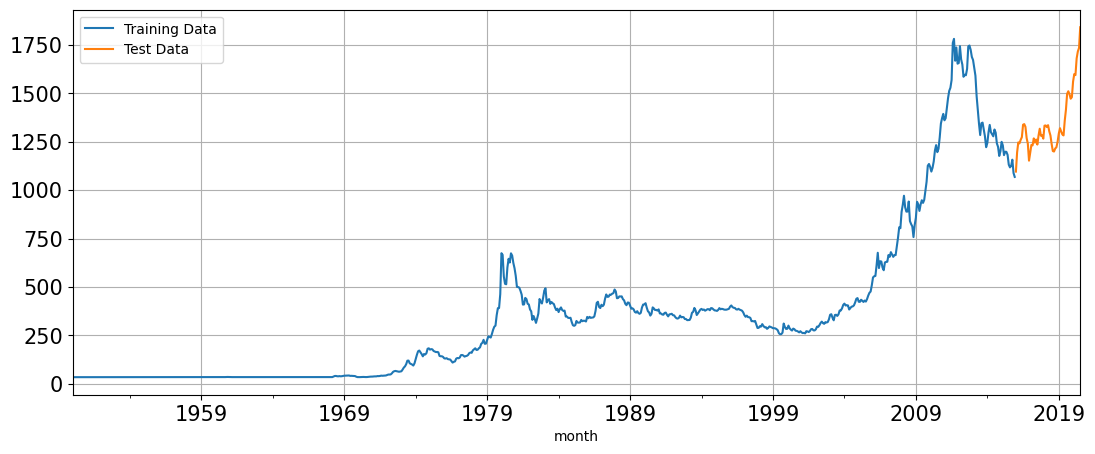

In [64]:
train['Price'].plot(figsize = (13,5) , fontsize = 15 )
test['Price'].plot(figsize = (13,5) , fontsize = 15)
plt.grid()
plt.legend(['Training Data' , 'Test Data'])
plt.show()

In [65]:
train_time = [i + 1 for i in range(len(train))]
test_time = [i + len(train)+1 for i in range(len(test))]
len(train_time) , len(test_time)


(792, 55)

In [66]:
LR_train = train.copy()
LR_test = test.copy()

In [67]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [68]:
lr = LinearRegression()
lr.fit(LR_train[['time']] , LR_train['Price'].values)

LinearRegression()

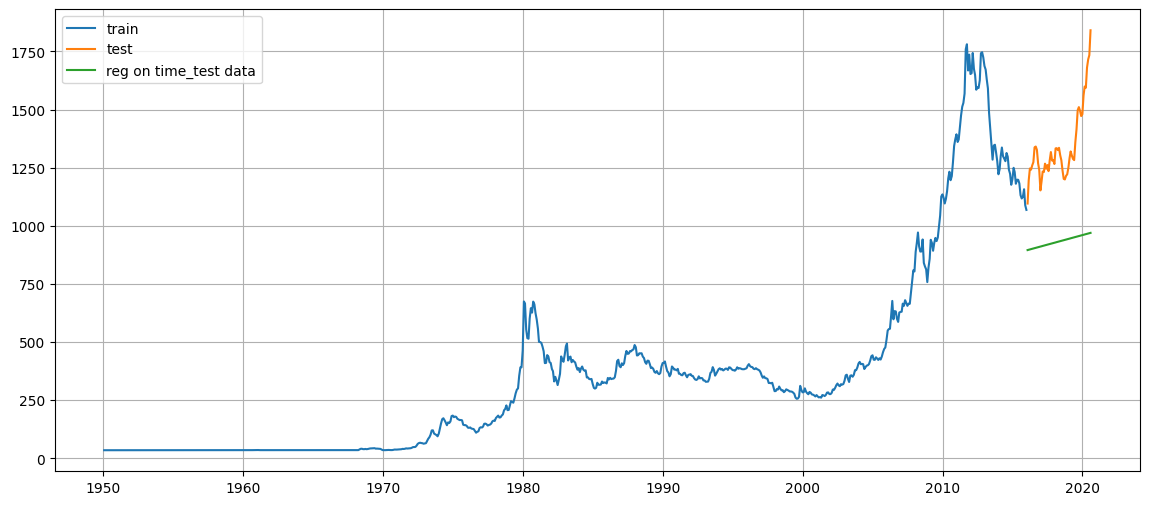

In [69]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = ( 14 , 6))
plt.plot(train['Price'] , label = 'train')
plt.plot(test['Price'] , label = 'test')
plt.plot(LR_test['forecast'] , label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [70]:
def mape(actual , pred) : return round((np.mean(abs(actual - pred) / actual)) *100 , 2)


In [71]:
mape_model1_test = mape(test['Price'].values ,test_predictions_model1)
print("MAPE is %3.3f" %(mape_model1_test) , "%")


MAPE is 29.760 %


In [72]:
results = pd.DataFrame({'Test Mape (%)' : [mape_model1_test]} , index = ['"RegressionOnTime'] )
results

,Test Mape (%)
"""RegressionOnTime",29.76


In [73]:
Naive_train = train.copy()
Naive_test = test.copy()

In [74]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price'])) -1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

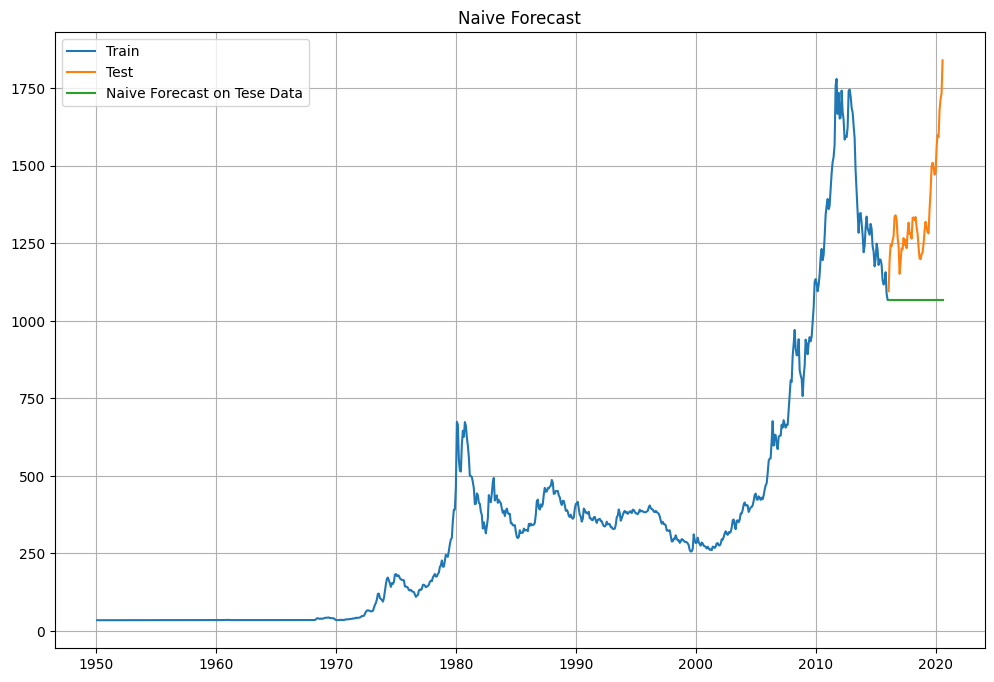

In [75]:
plt.figure(figsize = (12,8))
plt.plot(Naive_train['Price'] , label = 'Train')
plt.plot(test['Price'] , label = 'Test')
plt.plot(Naive_test['naive'] , label = "Naive Forecast on Tese Data")
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid();

In [76]:
mape_model2_test = mape(test['Price'].values , Naive_test['naive'].values)
print("For Naive forecast on the Test Data , MApe is #3.3f" %(mape_model2_test) , "%")

For Naive forecast on the Test Data , MApe is #3.3f %


In [77]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)' : [mape_model2_test]} , index = ['NaiveModel'])
results = pd.concat([results , resultsDf_2])
results

,Test Mape (%),Test MAPE (%)
"""RegressionOnTime",29.76,NaN
NaiveModel,NaN,19.38


In [79]:
final_model = ExponentialSmoothing( df ,
                                    trend = 'additive' ,
                                    seasonal = 'additive').fit(smoothing_level = 0.4 ,
                                                               smoothing_trend = 0.3 ,
                                                               smoothing_seasonal = 0.6)


In [80]:
Mape_final_model = mape(df['Price'].values , final_model.fittedvalues)

print("MAPE :" , Mape_final_model)

MAPE : 17.24


In [81]:
predictions = final_model.forecast(steps = len(test))

In [83]:
pred_df = pd.DataFrame({'lower_CI' : predictions - 1.96 * np.std(final_model.resid , ddof = 1) ,
                       'prediction' : predictions ,
                       'upper_CI' : predictions + 1.96 * np.std(final_model.resid , ddof = 1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


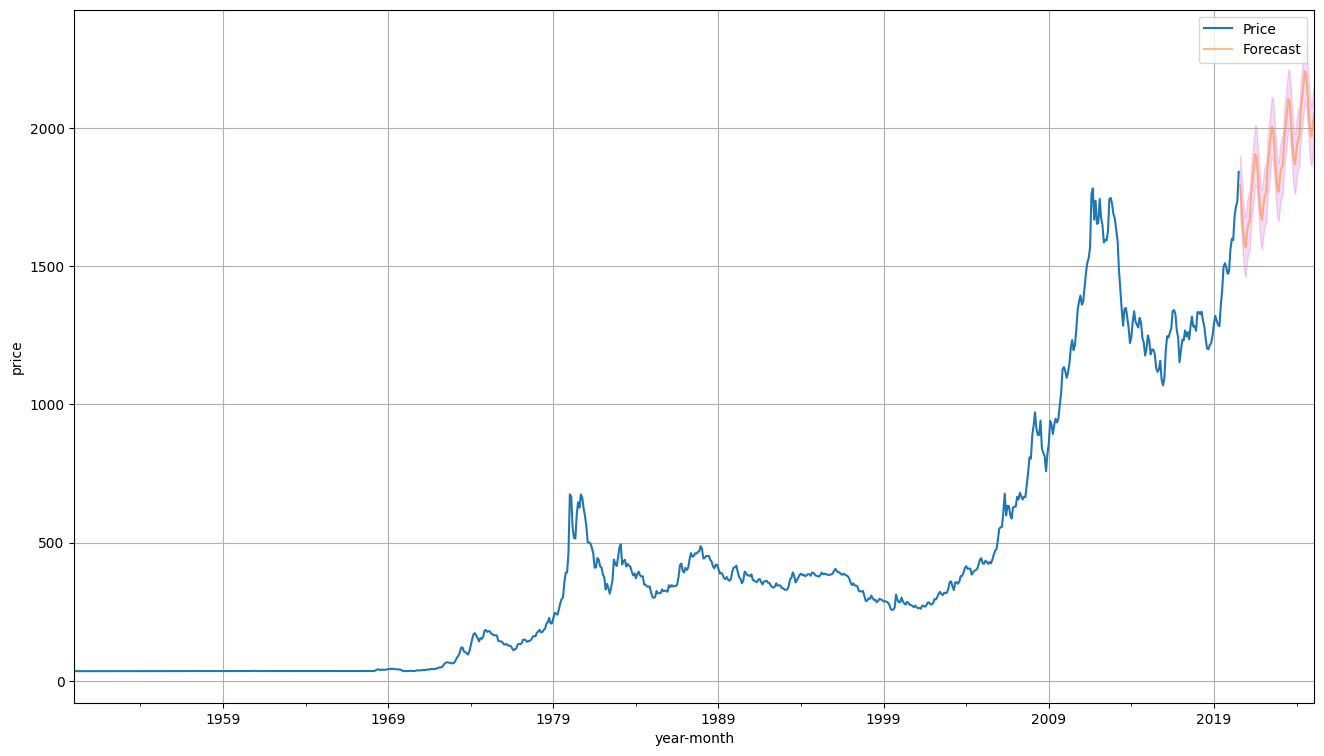

In [88]:
axis = df.plot(label = 'Actual' ,
               figsize = ( 16 , 9)
               )
pred_df['prediction'].plot(ax = axis ,
                           label = 'Forecast' ,
                           alpha = 0.5
                           )
axis.fill_between(pred_df.index ,
                  pred_df['lower_CI'] ,
                  pred_df['upper_CI'] ,
                  color = 'm' ,
                  alpha = 0.15
                  )
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show();